<a href="https://colab.research.google.com/github/spatank/Curiosity/blob/master/v8/C_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Curiosity_v8/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls # run !ls to verify location

build_Wiki_networks.ipynb  persistent_homology_KNOT.ipynb	  Simulations
C_plotting.ipynb	   persistent_homology_simulations.ipynb  Wiki
Figures			   persistent_homology_Wiki.ipynb
KNOT			   PH_plotting.ipynb


In [ ]:
import glob
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import sys
!{sys.executable} -m pip install traces

import traces

def time_normalize_and_merge(timeseries_lst, make_1_1 = False):
    """
    Takes in a list of time series (of possibly different lengths) and
    subsamples them using traces so they all range from 0 and 1 and are defined
    on the same points.
    """
    n_series = len(timeseries_lst)
    timeseries_lst = [traces.TimeSeries(zip(*(np.linspace(0, 1, len(ts)), ts)))
                      for ts in timeseries_lst]
    timeseries_lst = traces.TimeSeries.merge(timeseries_lst)
    if make_1_1:
        timeseries_lst[1.0] = [1.0] * n_series
    X = list(zip(*timeseries_lst.items()))[0]  # x values
    Y = list(zip(*timeseries_lst.items()))[1]  # y values across all series
    return X, Y

def plot_curve(curves_lst, curve_label = 'none', curve_color = 'none', null = 'none'):
  """
  Accepts a list of curves and the identity of the null model used if the data 
  come from one; curve_label and curve_color arguments are used for plotting.
  Plots average curve with a standard deviation/error band. 
  """
  
  max_nodes = max([len(lst) for lst in curves_lst])
  curves_mat = np.empty([len(curves_lst), max_nodes])
  curves_mat[:] = np.nan
  for i, j in enumerate(curves_lst):
    curves_mat[i][0:len(j)] = j
  numels = np.count_nonzero(~np.isnan(curves_mat), axis = 0)
  mean = np.nanmean(curves_mat, axis = 0)[numels != 1]
  std = np.nanstd(curves_mat, axis = 0)[numels != 1]
  # mins = mean - std
  mins = mean - np.divide(std, np.sqrt(numels[numels != 1]))
  mins = np.maximum(0, mins)
  # maxes = mean + std
  maxes = mean + np.divide(std, np.sqrt(numels[numels != 1]))
  X = np.arange(len(numels[numels != 1]))

  # Colors used elsewhere for the Betti curves:
  # colors = ['xkcd:emerald green', 'xkcd:tealish', 'xkcd:peacock blue']

  if null == 'none':
    plt.plot(X, mean, color = curve_color, label = curve_label,
              linewidth = 1)
    plt.fill_between(X, mins, maxes, facecolor = curve_color, alpha = 0.2)

  if null == 'edge_rewired':
    plt.plot(X, mean, color = '#7570b3', label = 'Edge Rewired',
              linewidth = 1)
    plt.fill_between(X, mins, maxes, facecolor = '#7570b3', alpha = 0.2)

  if null == 'latticized':
    plt.plot(X, mean, color = '#d95f02', label = 'Latticized',
              linewidth = 1)
    plt.fill_between(X, mins, maxes, facecolor = '#d95f02', alpha = 0.2)


def plot_curve_normalized_idx(curves_lst, curve_label = 'none', curve_color = 'none', null = 'none'):
  """
  Accepts a list of curves and the identity of the null model used if the data 
  come from one; curve_label and curve_color arguments are used for plotting.
  Plots average curve with a standard deviation/error band, and with the x-axis 
  normalized to be [0, 1].
  """
  
  X, Y = time_normalize_and_merge(curves_lst)
  mean = np.nanmean(Y, axis = 1)
  # mins = np.mean(Y, axis = 1) - np.std(Y, axis = 1)
  mins = np.nanmean(Y, axis = 1) - np.nanstd(Y, axis = 1)/np.sqrt(len(curves_lst))
  mins = np.maximum(0, mins)
  # maxes = np.mean(Y, axis = 1) + np.std(Y, axis = 1)
  maxes = np.nanmean(Y, axis = 1) + np.nanstd(Y, axis = 1)/np.sqrt(len(curves_lst))

  # Colors used elsewhere for the Betti curves:
  # colors = ['xkcd:emerald green', 'xkcd:tealish', 'xkcd:peacock blue']

  if null == 'none':
    plt.plot(X, mean, color = curve_color, label = curve_label,
              linewidth = 1)
    plt.fill_between(X, mins, maxes, facecolor = curve_color, alpha = 0.2)

  if null == 'edge_rewired':
    plt.plot(X, mean, color = '#7570b3', label = 'Edge Rewired',
              linewidth = 1)
    plt.fill_between(X, mins, maxes, facecolor = '#7570b3', alpha = 0.2)

  if null == 'latticized':
    plt.plot(X, mean, color = '#d95f02', label = 'Latticized',
              linewidth = 1)
    plt.fill_between(X, mins, maxes, facecolor = '#d95f02', alpha = 0.2)

# KNOT

In [ ]:
base_path = '/content/drive/My Drive/Curiosity_v8/KNOT/Processed/C/'

In [ ]:
files = glob.glob(base_path + '*.mat')

## All Participants

In [ ]:
files = glob.glob(base_path + '*.mat')

all_num_nodes = []
all_clust_coef = []
all_clust_coef_edge_rewired = []
all_clust_coef_latticized = []
all_C = []
all_C_edge_rewired = []
all_C_latticized = []
all_C_norm = []
all_C_norm_edge_rewired = []
all_C_norm_latticized = []
all_entropy = []
all_entropy_edge_rewired = []
all_entropy_latticized = []

for idx, C_file in enumerate(files):
  data_dict = sio.loadmat(C_file)
  num_nodes = data_dict['n']
  all_num_nodes.append(num_nodes)

  all_clust_coef.append(np.squeeze(data_dict['clust_coef']))
  clust_coef_edge_rewired = data_dict['clust_coef_edge_rewired']
  all_clust_coef_edge_rewired.append(list(np.nanmean(clust_coef_edge_rewired, axis = 0)))
  clust_coef_latticized = data_dict['clust_coef_latticized']
  all_clust_coef_latticized.append(list(np.nanmean(clust_coef_latticized, axis = 0)))

  all_C.append(np.squeeze(data_dict['C']))
  C_edge_rewired = data_dict['C_edge_rewired']
  all_C_edge_rewired.append(list(np.nanmean(C_edge_rewired, axis = 0)))
  C_latticized = data_dict['C_latticized']
  all_C_latticized.append(list(np.nanmean(C_latticized, axis = 0)))

  all_C_norm.append(np.squeeze(data_dict['C_norm']))
  C_norm_edge_rewired = data_dict['C_norm_edge_rewired']
  all_C_norm_edge_rewired.append(list(np.nanmean(C_norm_edge_rewired, axis = 0)))
  C_norm_latticized = data_dict['C_norm_latticized']
  all_C_norm_latticized.append(list(np.nanmean(C_norm_latticized, axis = 0)))

  all_entropy.append(np.squeeze(data_dict['entropy']))
  entropy_edge_rewired = data_dict['entropy_edge_rewired']
  all_entropy_edge_rewired.append(list(np.nanmean(entropy_edge_rewired, axis = 0)))
  entropy_latticized = data_dict['entropy_latticized']
  all_entropy_latticized.append(list(np.nanmean(entropy_latticized, axis = 0)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


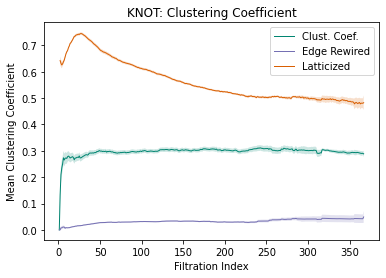

In [ ]:
plot_curve(all_clust_coef, curve_label = 'Clust. Coef.', curve_color = '#018571')
plot_curve(all_clust_coef_edge_rewired, null = 'edge_rewired')
plot_curve(all_C_norm_latticized, null = 'latticized')
plt.title('KNOT: Clustering Coefficient')
plt.xlabel('Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.legend(loc = "upper right")
plt.savefig('Figures/all_KNOT_clust_coef.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/lo

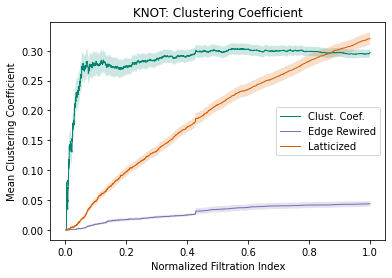

In [ ]:
plot_curve_normalized_idx(all_clust_coef, curve_label = 'Clust. Coef.', curve_color = '#018571')
plot_curve_normalized_idx(all_clust_coef_edge_rewired, null = 'edge_rewired')
plot_curve_normalized_idx(all_clust_coef_latticized, null = 'latticized')
plt.title('KNOT: Clustering Coefficient')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.legend(loc = "center right")
plt.savefig('Figures/all_KNOT_clust_coef_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


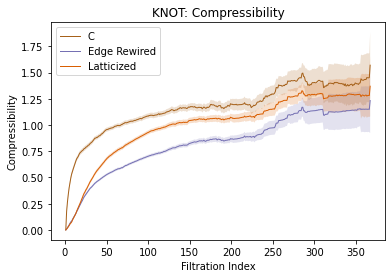

In [ ]:
plot_curve(all_C, curve_label = 'C', curve_color = '#a6611a')
plot_curve(all_C_edge_rewired, null = 'edge_rewired')
plot_curve(all_C_latticized, null = 'latticized')
plt.title('KNOT: Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = "upper left")
plt.savefig('Figures/all_KNOT_C.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/lo

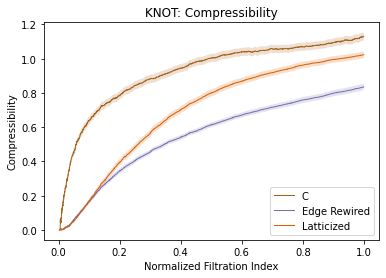

In [ ]:
plot_curve_normalized_idx(all_C, curve_label = 'C', curve_color = '#a6611a')
plot_curve_normalized_idx(all_C_edge_rewired, null = 'edge_rewired')
plot_curve_normalized_idx(all_C_latticized, null = 'latticized')
plt.title('KNOT: Compressibility')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = "lower right")
plt.savefig('Figures/all_KNOT_C_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


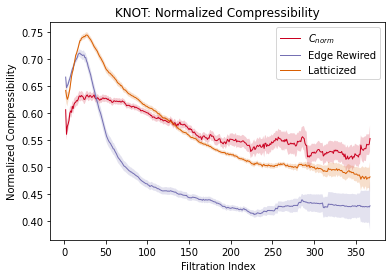

In [ ]:
plot_curve(all_C_norm, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plot_curve(all_C_norm_edge_rewired, null = 'edge_rewired')
plot_curve(all_C_norm_latticized, null = 'latticized')
plt.title('KNOT: Normalized Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = "upper right")
plt.savefig('Figures/all_KNOT_C_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/lo

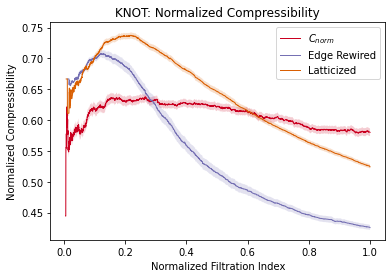

In [ ]:
plot_curve_normalized_idx(all_C_norm, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plot_curve_normalized_idx(all_C_norm_edge_rewired, null = 'edge_rewired')
plot_curve_normalized_idx(all_C_norm_latticized, null = 'latticized')
plt.title('KNOT: Normalized Compressibility')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = "upper right")
plt.savefig('Figures/all_KNOT_C_norm_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


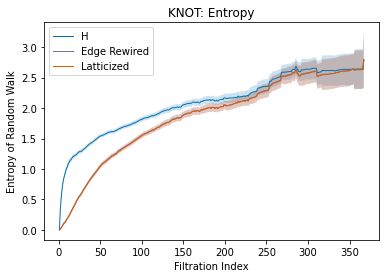

In [ ]:
plot_curve(all_entropy, curve_label = 'H', curve_color = '#0571b0')
plot_curve(all_entropy_edge_rewired, null = 'edge_rewired')
plot_curve(all_entropy_latticized, null = 'latticized')
plt.title('KNOT: Entropy')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy of Random Walk')
plt.legend(loc = "upper left")
plt.savefig('Figures/all_KNOT_entropy.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/lo

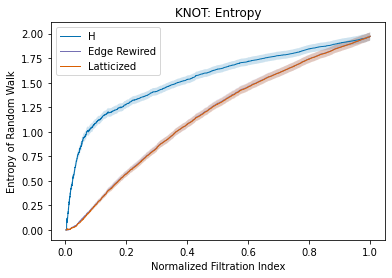

In [ ]:
plot_curve_normalized_idx(all_entropy, curve_label = 'H', curve_color = '#0571b0')
plot_curve_normalized_idx(all_entropy_edge_rewired, null = 'edge_rewired')
plot_curve_normalized_idx(all_entropy_latticized, null = 'latticized')
plt.title('KNOT: Entropy')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Entropy of Random Walk')
plt.legend(loc = "upper left")
plt.savefig('Figures/all_KNOT_entropy_time_norm.pdf', transparent = True, bbox_inches = 'tight')

## One Participant

In [ ]:
subj_ID = 106
data_dict = sio.loadmat(base_path + 'subj_' + str(subj_ID) + '_C.mat')
data_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'C', 'C_edge_rewired', 'C_latticized', 'C_norm', 'C_norm_edge_rewired', 'C_norm_latticized', 'clust_coef', 'clust_coef_edge_rewired', 'clust_coef_latticized', 'entropy', 'entropy_edge_rewired', 'entropy_latticized', 'n', 'subj_ID'])

In [ ]:
subj_ID = 106
data_dict = sio.loadmat(base_path + 'subj_' + str(subj_ID) + '_C.mat')

num_nodes = data_dict['n']

clust_coef = np.squeeze(data_dict['clust_coef'])
clust_coef_edge_rewired = data_dict['clust_coef_edge_rewired']
clust_coef_latticized = data_dict['clust_coef_latticized']

C = np.squeeze(data_dict['C'])
C_edge_rewired = data_dict['C_edge_rewired']
C_latticized = data_dict['C_latticized']

C_norm = np.squeeze(data_dict['C_norm'])
C_norm_edge_rewired = data_dict['C_norm_edge_rewired']
C_norm_latticized = data_dict['C_norm_latticized']

entropy = np.squeeze(data_dict['entropy'])
entropy_edge_rewired = data_dict['entropy_edge_rewired']
entropy_latticized = data_dict['entropy_latticized']

X = np.arange(num_nodes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


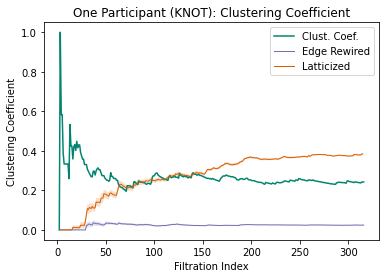

In [ ]:
plt.plot(X, clust_coef, color = '#018571', label = 'Clust. Coef.')
plot_curve(clust_coef_edge_rewired, null = 'edge_rewired')
plot_curve(clust_coef_latticized, null = 'latticized')
plt.title('One Participant (KNOT): Clustering Coefficient')
plt.xlabel('Filtration Index')
plt.ylabel('Clustering Coefficient')
plt.legend(loc = "upper right")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


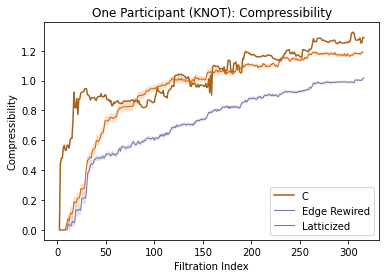

In [ ]:
plt.plot(X, C, color = '#a6611a', label = 'C')
plot_curve(C_edge_rewired, null = 'edge_rewired')
plot_curve(C_latticized, null = 'latticized')
plt.title('One Participant (KNOT): Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = "lower right")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


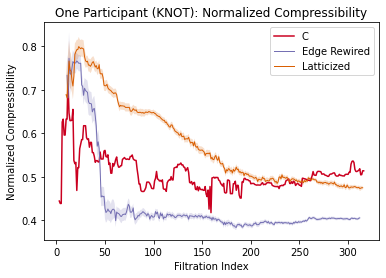

In [ ]:
plt.plot(X, C_norm, color = '#ca0020', label = 'C')
plot_curve(C_norm_edge_rewired, null = 'edge_rewired')
plot_curve(C_norm_latticized, null = 'latticized')
plt.title('One Participant (KNOT): Normalized Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = "upper right")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


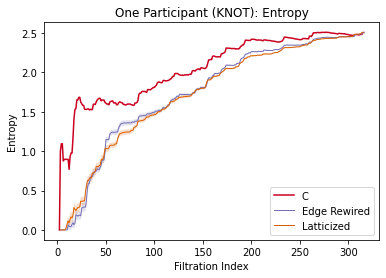

In [ ]:
plt.plot(X, entropy, color = '#ca0020', label = 'C')
plot_curve(entropy_edge_rewired, null = 'edge_rewired')
plot_curve(entropy_latticized, null = 'latticized')
plt.title('One Participant (KNOT): Entropy')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy')
plt.legend(loc = "lower right")

# Wikipedia Networks

In [ ]:
base_path = '/content/drive/My Drive/Curiosity_v8/Wiki/Processed/C/'

## All Topics

In [ ]:
files = glob.glob(base_path + '*.mat')

all_num_nodes = []
all_clust_coef = []
all_clust_coef_edge_rewired = []
all_clust_coef_latticized = []
all_C = []
all_C_edge_rewired = []
all_C_latticized = []
all_C_norm = []
all_C_norm_edge_rewired = []
all_C_norm_latticized = []
all_entropy = []
all_entropy_edge_rewired = []
all_entropy_latticized = []

for idx, C_file in enumerate(files):
  data_dict = sio.loadmat(C_file)
  num_nodes = data_dict['n']
  all_num_nodes.append(num_nodes)

  all_clust_coef.append(np.squeeze(data_dict['clust_coef']))
  clust_coef_edge_rewired = data_dict['clust_coef_edge_rewired']
  all_clust_coef_edge_rewired.append(list(np.nanmean(clust_coef_edge_rewired, axis = 0)))
  clust_coef_latticized = data_dict['clust_coef_latticized']
  all_clust_coef_latticized.append(list(np.nanmean(clust_coef_latticized, axis = 0)))

  all_C.append(np.squeeze(data_dict['C']))
  C_edge_rewired = data_dict['C_edge_rewired']
  all_C_edge_rewired.append(list(np.nanmean(C_edge_rewired, axis = 0)))
  C_latticized = data_dict['C_latticized']
  all_C_latticized.append(list(np.nanmean(C_latticized, axis = 0)))

  all_C_norm.append(np.squeeze(data_dict['C_norm']))
  C_norm_edge_rewired = data_dict['C_norm_edge_rewired']
  all_C_norm_edge_rewired.append(list(np.nanmean(C_norm_edge_rewired, axis = 0)))
  C_norm_latticized = data_dict['C_norm_latticized']
  all_C_norm_latticized.append(list(np.nanmean(C_norm_latticized, axis = 0)))

  all_entropy.append(np.squeeze(data_dict['entropy']))
  entropy_edge_rewired = data_dict['entropy_edge_rewired']
  all_entropy_edge_rewired.append(list(np.nanmean(entropy_edge_rewired, axis = 0)))
  entropy_latticized = data_dict['entropy_latticized']
  all_entropy_latticized.append(list(np.nanmean(entropy_latticized, axis = 0)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


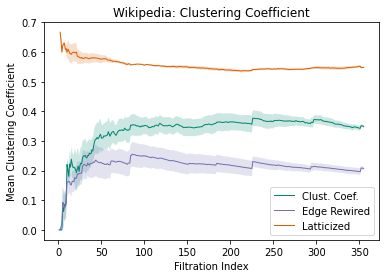

In [ ]:
plot_curve(all_clust_coef, curve_label = 'Clust. Coef.', curve_color = '#018571')
plot_curve(all_clust_coef_edge_rewired, null = 'edge_rewired')
plot_curve(all_C_norm_latticized, null = 'latticized')
plt.title('Wikipedia: Clustering Coefficient')
plt.xlabel('Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.legend(loc = "lower right")
plt.savefig('Figures/all_Wiki_clust_coef.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/lo

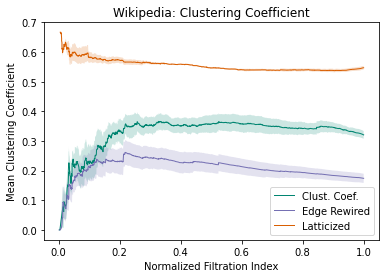

In [ ]:
plot_curve_normalized_idx(all_clust_coef, curve_label = 'Clust. Coef.', curve_color = '#018571')
plot_curve_normalized_idx(all_clust_coef_edge_rewired, null = 'edge_rewired')
plot_curve_normalized_idx(all_C_norm_latticized, null = 'latticized')
plt.title('Wikipedia: Clustering Coefficient')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.legend(loc = "lower right")
plt.savefig('Figures/all_Wiki_clust_coef_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


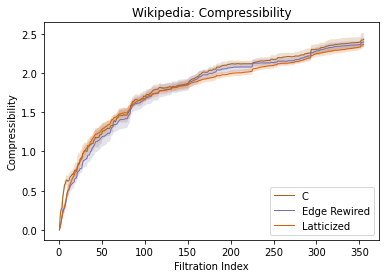

In [ ]:
plot_curve(all_C, curve_label = 'C', curve_color = '#a6611a')
plot_curve(all_C_edge_rewired, null = 'edge_rewired')
plot_curve(all_C_latticized, null = 'latticized')
plt.title('Wikipedia: Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = "lower right")
plt.savefig('Figures/all_Wiki_C.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/lo

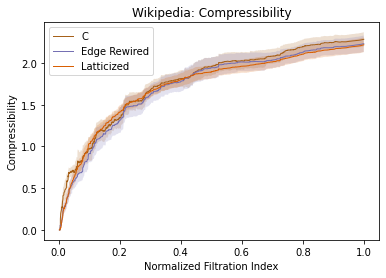

In [ ]:
plot_curve_normalized_idx(all_C, curve_label = 'C', curve_color = '#a6611a')
plot_curve_normalized_idx(all_C_edge_rewired, null = 'edge_rewired')
plot_curve_normalized_idx(all_C_latticized, null = 'latticized')
plt.title('Wikipedia: Compressibility')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = "upper left")
plt.savefig('Figures/all_Wiki_C_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


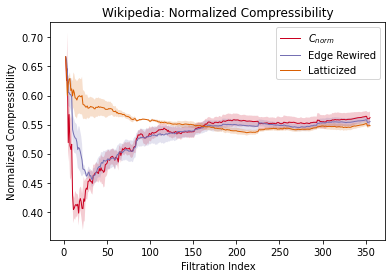

In [ ]:
plot_curve(all_C_norm, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plot_curve(all_C_norm_edge_rewired, null = 'edge_rewired')
plot_curve(all_C_norm_latticized, null = 'latticized')
plt.title('Wikipedia: Normalized Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = "upper right")
plt.savefig('Figures/all_Wiki_C_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/lo

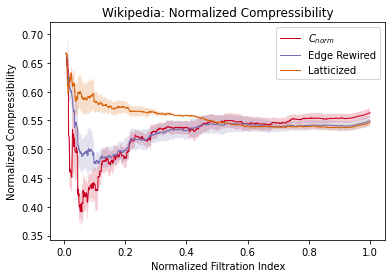

In [ ]:
plot_curve_normalized_idx(all_C_norm, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plot_curve_normalized_idx(all_C_norm_edge_rewired, null = 'edge_rewired')
plot_curve_normalized_idx(all_C_norm_latticized, null = 'latticized')
plt.title('Wikipedia: Normalized Compressibility')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = "upper right")
plt.savefig('Figures/all_Wiki_C_norm_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


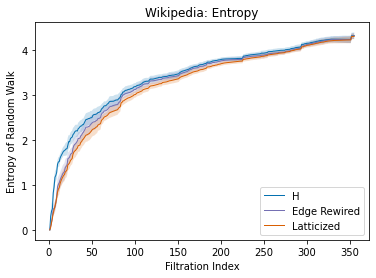

In [ ]:
plot_curve(all_entropy, curve_label = 'H', curve_color = '#0571b0')
plot_curve(all_entropy_edge_rewired, null = 'edge_rewired')
plot_curve(all_entropy_latticized, null = 'latticized')
plt.title('Wikipedia: Entropy')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy of Random Walk')
plt.legend(loc = "lower right")
plt.savefig('Figures/all_Wiki_entropy.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/lo

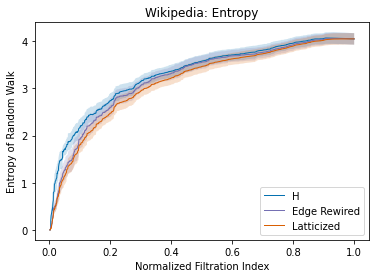

In [ ]:
plot_curve_normalized_idx(all_entropy, curve_label = 'H', curve_color = '#0571b0')
plot_curve_normalized_idx(all_entropy_edge_rewired, null = 'edge_rewired')
plot_curve_normalized_idx(all_entropy_latticized, null = 'latticized')
plt.title('Wikipedia: Entropy')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Entropy of Random Walk')
plt.legend(loc = "lower right")
plt.savefig('Figures/all_Wiki_entropy_time_norm.pdf', transparent = True, bbox_inches = 'tight')

## One Topic

In [ ]:
topic_ID = 'software_engineering'

data_dict = sio.loadmat(base_path + topic_ID + '_C.mat')

num_nodes = data_dict['n']

clust_coef = np.squeeze(data_dict['clust_coef'])
clust_coef_edge_rewired = data_dict['clust_coef_edge_rewired']
clust_coef_latticized = data_dict['clust_coef_latticized']

C = np.squeeze(data_dict['C'])
C_edge_rewired = data_dict['C_edge_rewired']
C_latticized = data_dict['C_latticized']

C_norm = np.squeeze(data_dict['C_norm'])
C_norm_edge_rewired = data_dict['C_norm_edge_rewired']
C_norm_latticized = data_dict['C_norm_latticized']

entropy = np.squeeze(data_dict['entropy'])
entropy_edge_rewired = data_dict['entropy_edge_rewired']
entropy_latticized = data_dict['entropy_latticized']

X = np.arange(num_nodes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


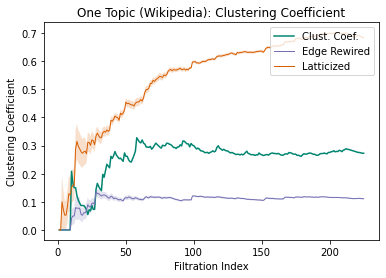

In [ ]:
plt.plot(X, clust_coef, color = '#018571', label = 'Clust. Coef.')
plot_curve(clust_coef_edge_rewired, null = 'edge_rewired')
plot_curve(clust_coef_latticized, null = 'latticized')
plt.title('One Topic (Wikipedia): Clustering Coefficient')
plt.xlabel('Filtration Index')
plt.ylabel('Clustering Coefficient')
plt.legend(loc = "upper right")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


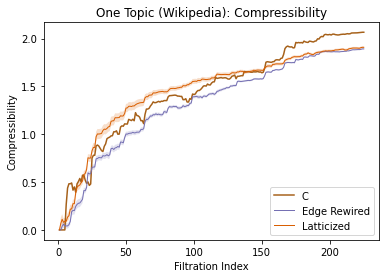

In [ ]:
plt.plot(X, C, color = '#a6611a', label = 'C')
plot_curve(C_edge_rewired, null = 'edge_rewired')
plot_curve(C_latticized, null = 'latticized')
plt.title('One Topic (Wikipedia): Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = "lower right")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


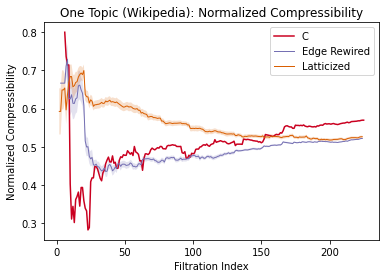

In [ ]:
plt.plot(X, C_norm, color = '#ca0020', label = 'C')
plot_curve(C_norm_edge_rewired, null = 'edge_rewired')
plot_curve(C_norm_latticized, null = 'latticized')
plt.title('One Topic (Wikipedia): Normalized Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = "upper right")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


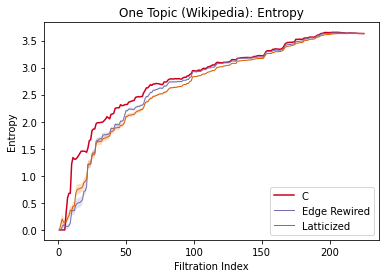

In [ ]:
plt.plot(X, entropy, color = '#ca0020', label = 'C')
plot_curve(entropy_edge_rewired, null = 'edge_rewired')
plot_curve(entropy_latticized, null = 'latticized')
plt.title('One Topic (Wikipedia): Entropy')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy')
plt.legend(loc = "lower right")

# Simulated Networks

In [ ]:
data_path = '/content/drive/My Drive/Curiosity_v8/Simulations/simulated_nets_C.mat'
data_dict = sio.loadmat(data_path)

## Constant Probability Model

In [ ]:
clust_coef_CP = data_dict['clust_coef_CP']
C_CP = data_dict['C_CP']
C_norm_CP = data_dict['C_norm_CP']
entropy_CP = data_dict['entropy_CP']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


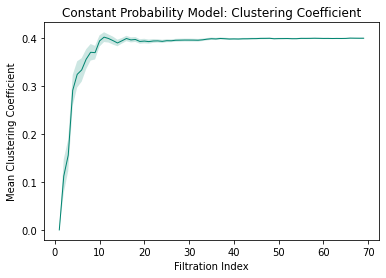

In [ ]:
plot_curve(clust_coef_CP, curve_label = 'Clust. Coef.', curve_color = '#018571')
plt.xlabel('Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.title('Constant Probability Model: Clustering Coefficient')
plt.savefig('Figures/constant_probability_clust_coef.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


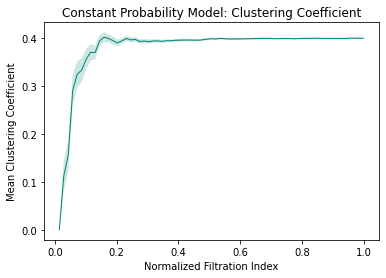

In [ ]:
plot_curve_normalized_idx(clust_coef_CP, curve_label = 'Clust. Coef.', curve_color = '#018571')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.title('Constant Probability Model: Clustering Coefficient')
plt.savefig('Figures/constant_probability_clust_coef_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


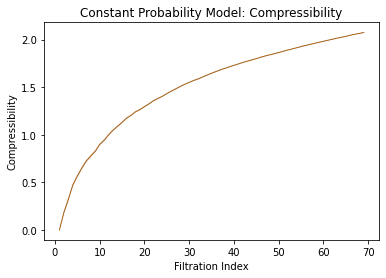

In [ ]:
plot_curve(C_CP, curve_label = 'Compressibility', curve_color = '#a6611a')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.title('Constant Probability Model: Compressibility')
plt.savefig('Figures/constant_probability_C.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


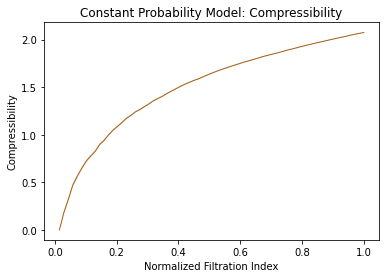

In [ ]:
plot_curve_normalized_idx(C_CP, curve_label = 'Compressibility', curve_color = '#a6611a')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Compressibility')
plt.title('Constant Probability Model: Compressibility')
plt.savefig('Figures/constant_probability_C_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


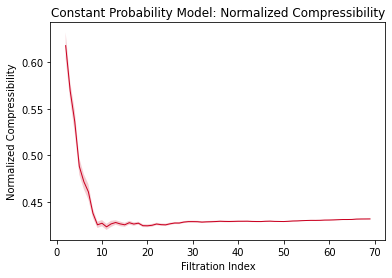

In [ ]:
plot_curve(C_norm_CP, curve_label = 'Normalized Compressibility', curve_color = '#ca0020')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.title('Constant Probability Model: Normalized Compressibility')
plt.savefig('Figures/constant_probability_C_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


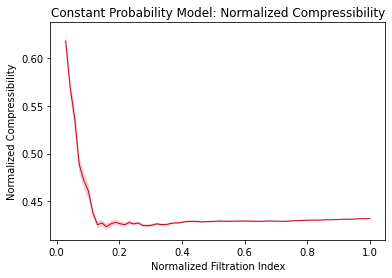

In [ ]:
plot_curve_normalized_idx(C_norm_CP, curve_label = 'Normalized Compressibility', curve_color = '#ca0020')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.title('Constant Probability Model: Normalized Compressibility')
plt.savefig('Figures/constant_probability_C_norm_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


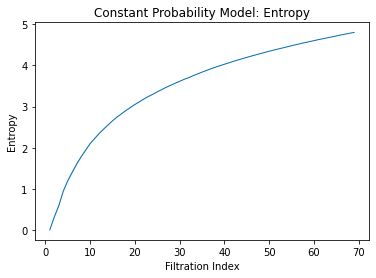

In [ ]:
plot_curve(entropy_CP, curve_label = 'Entropy', curve_color = '#0571b0')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy')
plt.title('Constant Probability Model: Entropy')
plt.savefig('Figures/constant_probability_entropy.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


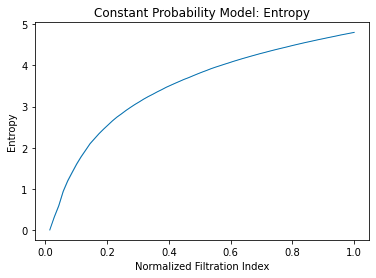

In [ ]:
plot_curve_normalized_idx(entropy_CP, curve_label = 'Entropy', curve_color = '#0571b0')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Entropy')
plt.title('Constant Probability Model: Entropy')
plt.savefig('Figures/constant_probability_entropy_time_norm.pdf', transparent = True, bbox_inches = 'tight')

## Proportional Probability Model

In [ ]:
clust_coef_PP = data_dict['clust_coef_PP']
C_PP = data_dict['C_PP']
C_norm_PP = data_dict['C_norm_PP']
entropy_PP = data_dict['entropy_PP']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


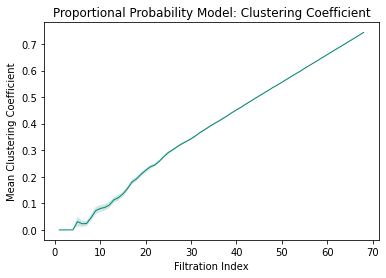

In [ ]:
plot_curve(clust_coef_PP, curve_label = 'Clust. Coef.', curve_color = '#018571')
plt.xlabel('Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.title('Proportional Probability Model: Clustering Coefficient')
plt.savefig('Figures/proportional_probability_clust_coef.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


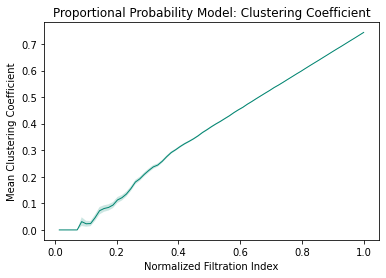

In [ ]:
plot_curve_normalized_idx(clust_coef_PP, curve_label = 'Clust. Coef.', curve_color = '#018571')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.title('Proportional Probability Model: Clustering Coefficient')
plt.savefig('Figures/proportional_probability_clust_coef_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


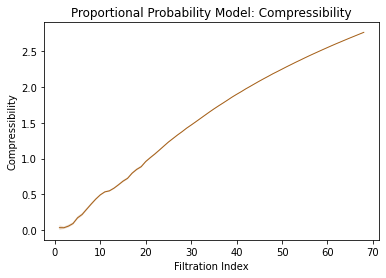

In [ ]:
plot_curve(C_PP, curve_label = 'Compressibility', curve_color = '#a6611a')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.title('Proportional Probability Model: Compressibility')
plt.savefig('Figures/proportional_probability_C.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


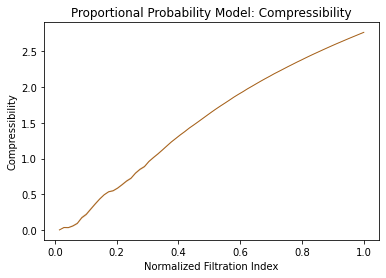

In [ ]:
plot_curve_normalized_idx(C_PP, curve_label = 'Compressibility', curve_color = '#a6611a')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Compressibility')
plt.title('Proportional Probability Model: Compressibility')
plt.savefig('Figures/proportional_probability_C_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


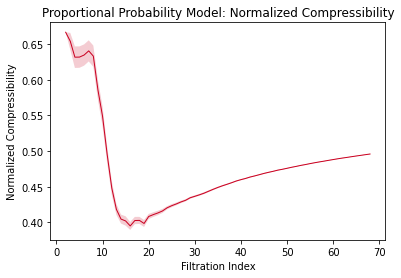

In [ ]:
plot_curve(C_norm_PP, curve_label = 'Normalized Compressibility', curve_color = '#ca0020')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.title('Proportional Probability Model: Normalized Compressibility')
plt.savefig('Figures/proportional_probability_C_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


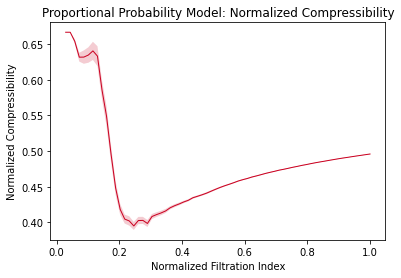

In [ ]:
plot_curve_normalized_idx(C_norm_PP, curve_label = 'Normalized Compressibility', curve_color = '#ca0020')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.title('Proportional Probability Model: Normalized Compressibility')
plt.savefig('Figures/proportional_probability_C_norm_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


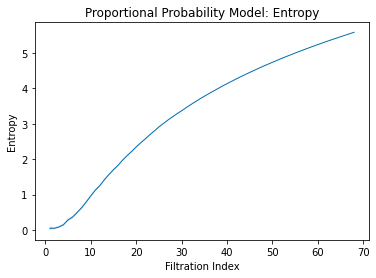

In [ ]:
plot_curve(entropy_PP, curve_label = 'Entropy', curve_color = '#0571b0')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy')
plt.title('Proportional Probability Model: Entropy')
plt.savefig('Figures/proportional_probability_entropy.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


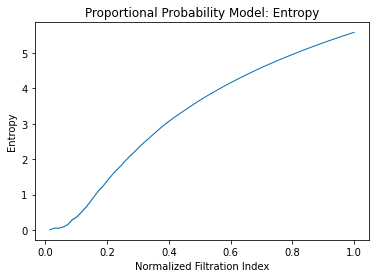

In [ ]:
plot_curve_normalized_idx(entropy_PP, curve_label = 'Entropy', curve_color = '#0571b0')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Entropy')
plt.title('Proportional Probability Model: Entropy')
plt.savefig('Figures/proportional_probability_entropy_time_norm.pdf', transparent = True, bbox_inches = 'tight')

## Preferential Attachment Model

In [ ]:
clust_coef_PA = data_dict['clust_coef_PA']
C_PA = data_dict['C_PA']
C_norm_PA = data_dict['C_norm_PA']
entropy_PA = data_dict['entropy_PA']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


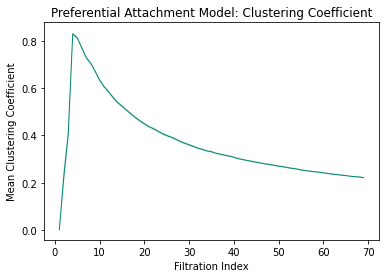

In [ ]:
plot_curve(clust_coef_PA, curve_label = 'Clust. Coef.', curve_color = '#018571')
plt.xlabel('Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.title('Preferential Attachment Model: Clustering Coefficient')
plt.savefig('Figures/preferential_attachment_clust_coef.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


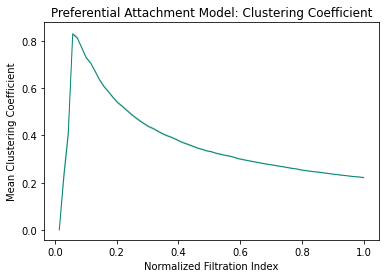

In [ ]:
plot_curve_normalized_idx(clust_coef_PA, curve_label = 'Clust. Coef.', curve_color = '#018571')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.title('Preferential Attachment Model: Clustering Coefficient')
plt.savefig('Figures/preferential_attachment_clust_coef_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


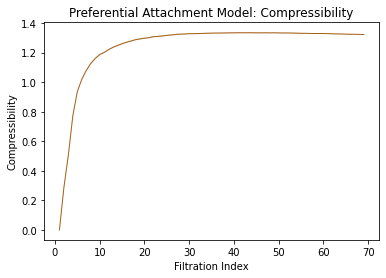

In [ ]:
plot_curve(C_PA, curve_label = 'Compressibility', curve_color = '#a6611a')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.title('Preferential Attachment Model: Compressibility')
plt.savefig('Figures/preferential_attachment_C.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


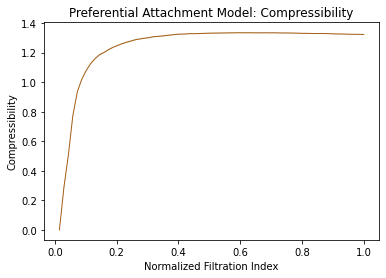

In [ ]:
plot_curve_normalized_idx(C_PA, curve_label = 'Compressibility', curve_color = '#a6611a')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Compressibility')
plt.title('Preferential Attachment Model: Compressibility')
plt.savefig('Figures/preferential_attachment_C_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


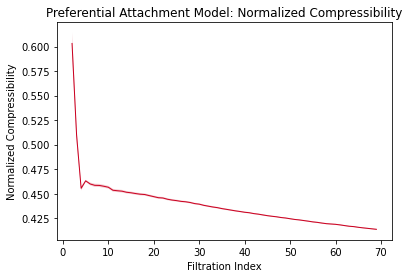

In [ ]:
plot_curve(C_norm_PA, curve_label = 'Normalized Compressibility', curve_color = '#ca0020')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.title('Preferential Attachment Model: Normalized Compressibility')
plt.savefig('Figures/preferential_attachment_C_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


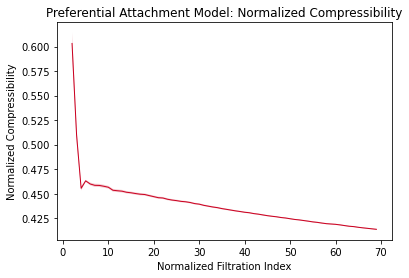

In [ ]:
plot_curve(C_norm_PA, curve_label = 'Normalized Compressibility', curve_color = '#ca0020')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.title('Preferential Attachment Model: Normalized Compressibility')
plt.savefig('Figures/preferential_attachment_C_norm_time_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


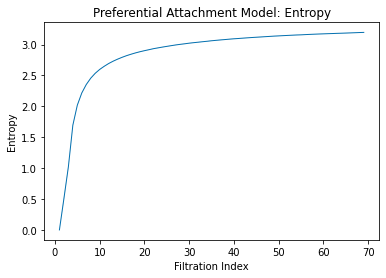

In [ ]:
plot_curve(entropy_PA, curve_label = 'Entropy', curve_color = '#0571b0')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy')
plt.title('Preferential Attachment Model: Entropy')
plt.savefig('Figures/preferential_attachment_entropy.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


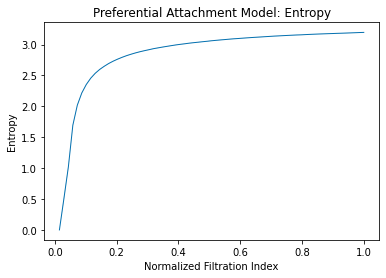

In [ ]:
plot_curve_normalized_idx(entropy_PA, curve_label = 'Entropy', curve_color = '#0571b0')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Entropy')
plt.title('Preferential Attachment Model: Entropy')
plt.savefig('Figures/preferential_attachment_entropy_time_norm.pdf', transparent = True, bbox_inches = 'tight')